# ML with PyTorch - Linear Regression Example

## Workflow
0. Data
1. Model
    - $f(X) = X \beta = \hat y$
2. Loss
    - $l_i = y_i - \hat y_i$
    - $L = \frac{1}{n} \sum y_i^2$
3. Optimizer
    - SGD
    - or in this linear case, we can get solution directly with
        - $\hat\beta = (X^TX)^{-1}X^Ty$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
import torch
from torch import nn
from torch import optim

In [2]:
from make_lin_regression import *

## 0. Data

In [3]:
def data_loader(device):
    dom_np, dom, X, y = make_lin_regression()
    X = torch.from_numpy(X).float().to(device)
    y = torch.from_numpy(y).float().unsqueeze(-1).to(device)    # unsqueeze from vector to 2D tensor, match dimension of X
    dom = dom.to(device)
    return dom_np, dom, X, y

## Training Function

In [4]:
def train(model, X, y, lr, loss_fn, num_epoch):
    # tell PyTorch we are in training mode
    model.train()
    # SGD
    optimizer = optim.SGD(model.parameters(), lr = lr)
    
    for epoch in range(0, num_epoch):
        # PyTorch accumulates the gradients on subsequent backward passes
        # need to zero out gradient at the start so the parameters update correctly
        optimizer.zero_grad()
        # calculate prediction
        y_ = model(X)
        # calculate loss
        loss = loss_fn(y_,y)
        # back-prop to get gradient
        loss.backward()
        # SGD update
        optimizer.step()
        print("Epoch: {} \tTraining Cost: {:.6f}".format(epoch, loss))
    return model        

## 1. Model Class

In [5]:
class LinReg(nn.Module):
    def __init__(self, input_dim):
        # initialize nn.Module super class
        super().__init__()
        self.beta = nn.Linear(input_dim, 1)
        
    def forward(self, X):
        return self.beta(X)

## *move model to GPU if applicable

device(type='cpu')

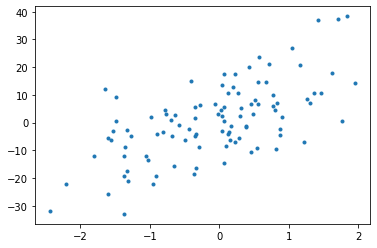

In [6]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
dom_np, dom, X, y = data_loader(device)
device

## 2. Loss

In [7]:
# squred L2 norm
loss_fn = nn.MSELoss()

## Model

In [8]:
model = LinReg(1).to(device)
model = train(model, X, y, 0.1, loss_fn, 10)

Epoch: 0 	Training Cost: 196.148727
Epoch: 1 	Training Cost: 166.247330
Epoch: 2 	Training Cost: 146.460175
Epoch: 3 	Training Cost: 133.350098
Epoch: 4 	Training Cost: 124.653847
Epoch: 5 	Training Cost: 118.879051
Epoch: 6 	Training Cost: 115.040184
Epoch: 7 	Training Cost: 112.485733
Epoch: 8 	Training Cost: 110.784363
Epoch: 9 	Training Cost: 109.650185


## 3. Optimizer

In [9]:
# SGD
optimizer = optim.SGD(model.parameters(), lr=0.01)

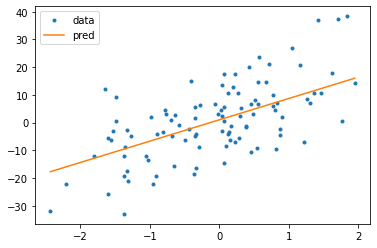

In [10]:
# tell PyTorch we are in evaluation mode
model.eval()
# do not calculate gradient during evaluation
with torch.no_grad():
    y_ = model(dom)

# visualize
fig, ax = plt.subplots()
ax.plot(X.numpy(), y.numpy(), ".", label="data")
ax.plot(dom_np, y_.numpy(), "-", label="pred")
ax.legend();

## Showing model information

In [11]:
model.beta

Linear(in_features=1, out_features=1, bias=True)

In [12]:
model.beta.weight

Parameter containing:
tensor([[7.6987]], requires_grad=True)

In [13]:
model.beta.bias

Parameter containing:
tensor([0.9930], requires_grad=True)